In [1]:
# %tensorflow_version 2.x
%load_ext tensorboard
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as layers
import tensorflow.keras.callbacks as callbacks
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import datetime
from tensorflow.keras.models import load_model

## подготовка

In [3]:
path_to_data = "data"

# Общая часть

> **Если вы используете colab, не забудьте подключить GPU!** Edit $\rightarrow$ Notenook settings $\rightarrow$  Hardware Acceleration.


## Как прислать Д/з
Д/з можете присылать ссылками на colab / в виде ipynb или py-скриптов. Можно ссылками на github.

## Загрузка данных

In [4]:
(__x_train, y_train), (__x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = (np.reshape(__x_train, (__x_train.shape[0], -1)) / 255. - 0.5) * 2  # исправил на __x_train
x_test = (np.reshape(__x_test, (__x_test.shape[0], -1)) / 255. - 0.5) * 2  # исправил на __x_test

## Код для создания и обучения модели

**Важно!** Вы можете менять код функции `get_model`, если хотите получить лучшие результаты или просто поэксперементировать.

### 1) начальный вариант 

In [5]:
def get_model(n_classes):
  activation = 'tanh'
  units = 256
  model = keras.Sequential([
    layers.Dense(units, activation=activation),
    layers.Dense(units, activation=activation),
    layers.Dense(n_classes, activation='softmax')])
  return model

In [9]:
model = get_model(10)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

In [10]:
%%time

early_stopping = callbacks.EarlyStopping(min_delta=0.001, patience=3, 
                                         restore_best_weights=True)


epochs = 100
batch_size = 128
histrory = model.fit(x_train, y_train, 
                      validation_data=(x_test, y_test),
                      epochs=epochs,
                      batch_size=batch_size,
                      callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.7796 - accuracy: 0.7465 - val_loss: 0.5922 - val_accuracy: 0.7973
Epoch 2/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.5265 - accuracy: 0.8177 - val_loss: 0.5234 - val_accuracy: 0.8135
Epoch 3/100
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4747 - accuracy: 0.8340 - val_loss: 0.4885 - val_accuracy: 0.8259
Epoch 4/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4462 - accuracy: 0.8436 - val_loss: 0.4685 - val_accuracy: 0.8334
Epoch 5/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.4264 - accuracy: 0.8501 - val_loss: 0.4545 - val_accuracy: 0.8379
Epoch 6/100
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4119 - accuracy: 0.8550 - val_loss: 0.4455 - val_accuracy: 0.8405
Epoch 7/100
60000/60000 [=========================

### 2) с моими изменениями 

In [14]:
def get_model(n_classes):
  activation = 'relu'
  units = 512
  model = keras.Sequential([
    layers.Dense(units, activation=activation),
    layers.Dense(units, activation=activation),
    layers.Dense(units, activation=activation),
    layers.Dense(units, activation=activation),
    layers.Dense(n_classes, activation='softmax')])
  return model

In [15]:
model = get_model(10)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

In [16]:
%%time

early_stopping = callbacks.EarlyStopping(min_delta=0.001, patience=3, 
                                         restore_best_weights=True)


epochs = 100
batch_size = 128
histrory = model.fit(x_train, y_train, 
                      validation_data=(x_test, y_test),
                      epochs=epochs,
                      batch_size=batch_size,
                      callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 105us/sample - loss: 0.8161 - accuracy: 0.7340 - val_loss: 0.5592 - val_accuracy: 0.7987
Epoch 2/100
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4958 - accuracy: 0.8223 - val_loss: 0.4968 - val_accuracy: 0.8184
Epoch 3/100
60000/60000 [==============================] - 7s 118us/sample - loss: 0.4429 - accuracy: 0.8413 - val_loss: 0.4753 - val_accuracy: 0.8288
Epoch 4/100
60000/60000 [==============================] - 8s 125us/sample - loss: 0.4143 - accuracy: 0.8514 - val_loss: 0.4358 - val_accuracy: 0.8437
Epoch 5/100
60000/60000 [==============================] - 8s 134us/sample - loss: 0.3938 - accuracy: 0.8581 - val_loss: 0.4339 - val_accuracy: 0.8398
Epoch 6/100
60000/60000 [==============================] - 8s 130us/sample - loss: 0.3772 - accuracy: 0.8657 - val_loss: 0.4202 - val_accuracy: 0.8432
Epoch 7/100
60000/60000 [===================

**Результаты:**
- изменения: relu, 2 дополнительных слоя, по 512 нейронов в слое
- время обучения увеличилось с 1 до 4 минут
- результат улучшился, но не сильно. Лучшее аккураси увеличилось с 0.8745 до 0.8791 (23 эпоха)

# Задание 1. Слой для подготовки данных

Создайте слой, который:
* получает на вход батч `(None, 28, 28)` и возвращает батч
`(None, 784)`. 
* Приводит значения интенсивности пикселей из диапазона `[0, 255]` к диапазону `[-1, 1]`.
* *Дополнительно*: сделайте слой сериализуемым.


Шаблон с кодом приведен ниже. Обучите модель с использованием этого слоя, убедитесь, что она обучается корректно.

In [33]:
class DataPreparation(layers.Layer):
    def __init__(self):
        # Самодостаточен, дописывать не надо.
        super().__init__()
        self.flattened_dim=None
        
    def build(self, input_shape):
        # сделал для лучшей структуризации кода
        self.flattened_dim = input_shape[1] * input_shape[2]

    def call(self, inputs):
        # Совет: чтобы получить целевую размерность, используйте все измерения 
        # тензора, кроме размерности батча, которая не определена на этапе
        # компиляции. Выполните изменение размерности как
        # tf.reshape(inputs, [-1, flattened_dim])
        # где -1 - размерность, которая вычислится динамически.
        # Если нужно преобразовать тип данных от int к float, используйте tf.cast
        # self.flattened_dim = inputs.shape[1] * inputs.shape[2]

        return (tf.cast(tf.reshape(inputs, [-1, self.flattened_dim]), dtype=tf.float32) / 255. - 0.5) * 2

    def get_config(self):
        # Необязательное задание.
        # Дополните этот метод. Проверьте, работает ли он, при помощи model.save()
        config = super().get_config()
        config.update({'flattened_dim': self.flattened_dim})
        return config

In [14]:
# !kill 1308

In [7]:
# !tensorboard --logdir logs

In [21]:
# Можно запустить tensorbaord, если вы подключили TensorBoard callback
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 1308), started 2 days, 2:31:34 ago. (Use '!kill 1308' to kill it.)

## Код для обучения модели

In [37]:
def get_model_with_preparation(n_classes):
    activation = 'tanh'
    units = 256
    model = keras.Sequential([
        DataPreparation(),
        layers.Dense(units, activation=activation),
        layers.Dense(units, activation=activation),
        layers.Dense(n_classes, activation='softmax')])
    return model

In [38]:
model = get_model_with_preparation(10)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

Передавайте необработанные данные, т.е. `__x_train`, `__x_test`.

In [39]:
%%time

early_stopping = callbacks.EarlyStopping(min_delta=0.001, patience=3, 
                                         restore_best_weights=True)

logdir = os.path.join("logs", "hw5",
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard = keras.callbacks.TensorBoard(logdir, histogram_freq=1)

epochs = 100
batch_size = 128
histrory = model.fit(__x_train, y_train, 
                      validation_data=(__x_test, y_test),
                      epochs=epochs,
                      batch_size=batch_size,
                      callbacks=[early_stopping, tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.7716 - accuracy: 0.7466 - val_loss: 0.5903 - val_accuracy: 0.7918
Epoch 2/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.5272 - accuracy: 0.8155 - val_loss: 0.5220 - val_accuracy: 0.8111
Epoch 3/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.4766 - accuracy: 0.8318 - val_loss: 0.4921 - val_accuracy: 0.8243
Epoch 4/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4484 - accuracy: 0.8421 - val_loss: 0.4695 - val_accuracy: 0.8332
Epoch 5/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.4285 - accuracy: 0.8490 - val_loss: 0.4580 - val_accuracy: 0.8339
Epoch 6/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4141 - accuracy: 0.8534 - val_loss: 0.4448 - val_accuracy: 0.8387
Epoch 7/100
60000/60000 [=========================

In [40]:
model.save(os.path.join(path_to_data, 'my_model'))

INFO:tensorflow:Assets written to: data\my_model\assets


#### проверим корректность записи

In [41]:
model.predict(__x_test)[0]

array([4.6995956e-06, 2.8768096e-05, 1.0195869e-04, 1.0338865e-04,
       8.2624269e-05, 5.0968762e-02, 1.2752532e-04, 2.7678564e-02,
       1.9157652e-03, 9.1898793e-01], dtype=float32)

In [42]:
loaded_model = load_model(os.path.join(path_to_data, 'my_model'))

In [43]:
loaded_model.predict(__x_test)[0]

array([4.6995956e-06, 2.8768096e-05, 1.0195869e-04, 1.0338865e-04,
       8.2624269e-05, 5.0968762e-02, 1.2752532e-04, 2.7678564e-02,
       1.9157652e-03, 9.1898793e-01], dtype=float32)

In [45]:
(model.predict(__x_test) == loaded_model.predict(__x_test)).all()

True

# Задание 2. Слой с гауссовым шумом

Создайте слой, который будет добавлять к входным данным нормально распределенный (с $\mu = 0$ и заданной $\sigma$) шум *и затем*  обрабатывать измененные данные как полносзвязный слой.

Для этого завершите шаблон класса. 

Посоле этого сравните, как обучается модель с различными значениями $\sigma$, к примеру, $0, 0.01, 0.05, 0.1, ...$. Постройте графики в matplotlib или tensorboard. При $\sigma = 0$ слой должен действовать так же, как обычный полносзвязный слой.

Желательно провести несколько экспериментов для каждого значения $\sigma$.

In [47]:
class GaussianDense(layers.Dense):
    def __init__(self, *args, **kwargs):
        # Обратите внимание, что слой наследует Layer -> Dense -> GaussianDense.
        # Проще всего передать агрументы в констркутор базового класса 
        # через *args (позициональные аргументы) и **kwargs (именованные).
        # При этом нужный агрумент класса можно извлечь из kwargs так:
        # std = kwargs.pop('std')
        # Для корректной работы в конструкторе аргумент std должен 
        # быть передан по имени! Пример:
        # gs = GaussianDense(units, std=std)
        self.std = kwargs.pop('std')
        super().__init__(*args, **kwargs)
    

    def build(self, *args, **kwargs):
        # Достаточно вызова build базового класса.
        super().build(*args, **kwargs)

    def call(self, inputs):
        # Добавить случайный шум, генерируемый методом tf.random.normal.
        # Чтобы определить размерность шума, используйте tf.shape(inputs) - 
        # это поможет избежать сложностей с динамическим размером массива.
        # Вызвать call базового класса можно при помощи super().
        noise = tf.random.normal(shape=tf.shape(inputs), stddev=self.std)
        inputs += noise
        return super().call(inputs)

    def get_config(self):
        config = super().get_config()
        config.update({"std": self.std})
        return config
        

## Создание и обучение модели

In [48]:
def get_model_with_noise(n_classes):
  activation = 'tanh'
  units = 256
  std = 0.01
  model = keras.Sequential([
    DataPreparation(),
    GaussianDense(units, activation=activation, std=std),
    GaussianDense(units, activation=activation, std=std),
    layers.Dense(n_classes, activation='softmax')])
  return model

In [49]:
model = get_model_with_noise(10)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

In [50]:
%%time

early_stopping = callbacks.EarlyStopping(min_delta=0.001, patience=3, 
                                         restore_best_weights=True)
logdir = os.path.join("logs", "gaussian",
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard = keras.callbacks.TensorBoard(logdir, histogram_freq=1)

epochs = 100
batch_size = 128
histrory = model.fit(__x_train, y_train, 
                      validation_data=(__x_test, y_test),
                      epochs=epochs,
                      batch_size=batch_size,
                      callbacks=[early_stopping, tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 46us/sample - loss: 0.7830 - accuracy: 0.7430 - val_loss: 0.5890 - val_accuracy: 0.7941
Epoch 2/100
60000/60000 [==============================] - 3s 44us/sample - loss: 0.5256 - accuracy: 0.8173 - val_loss: 0.5212 - val_accuracy: 0.8160
Epoch 3/100
60000/60000 [==============================] - 2s 42us/sample - loss: 0.4746 - accuracy: 0.8340 - val_loss: 0.4888 - val_accuracy: 0.8272
Epoch 4/100
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4463 - accuracy: 0.8432 - val_loss: 0.4708 - val_accuracy: 0.8327
Epoch 5/100
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4265 - accuracy: 0.8496 - val_loss: 0.4538 - val_accuracy: 0.8366
Epoch 6/100
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4118 - accuracy: 0.8552 - val_loss: 0.4447 - val_accuracy: 0.8390
Epoch 7/100
60000/60000 [=========================

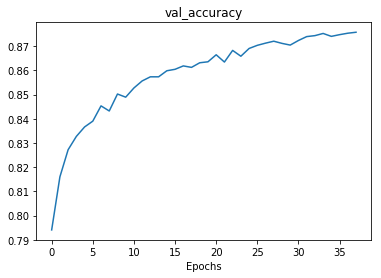

In [55]:
plt.plot(histrory.history["val_accuracy"])
plt.xlabel("Epochs")
plt.title("val_accuracy");

## Исследование модели

In [59]:
import pandas as pd

In [58]:
def get_model_with_noise(n_classes, std=0.01):
    activation = 'tanh'
    units = 256
    model = keras.Sequential([
        DataPreparation(),
        GaussianDense(units, activation=activation, std=std),
        GaussianDense(units, activation=activation, std=std),
        layers.Dense(n_classes, activation='softmax')])
    return model

In [119]:
def get_val_accuracies(std, num, epochs=10):
    val_accuracies = pd.DataFrame()
    for i in range(num):
    
        model = get_model_with_noise(10, std)
        model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
                      metrics=['accuracy'],
                      loss='sparse_categorical_crossentropy')

        batch_size = 128
        histrory = model.fit(__x_train, y_train, 
                             validation_data=(__x_test, y_test),
                             epochs=epochs,
                             batch_size=batch_size,
                             verbose=0
                            )
        val_accuracies[i] = histrory.history["val_accuracy"]
    
    val_accuracies["means"] = val_accuracies.mean(axis=1)
    val_accuracies["stds"] = val_accuracies.std(axis=1)
    
    return val_accuracies

In [122]:
def plot_val_accuracies_means_stds(val_accuracies, std):
    plt.figure(figsize=(8, 5))
    plt.plot(list(val_accuracies.index), val_accuracies["means"])
    plt.fill_between(list(val_accuracies.index), 
                     val_accuracies["means"]-val_accuracies["stds"], 
                     val_accuracies["means"]+val_accuracies["stds"], alpha=.3)
    plt.title(f"val_accuracy, std = {std}")
    plt.xlabel("Epochs")
    plt.show()

#### для каждого **_sigma_** рассчитываем **5** вариантов, после чего строим **среднее** и **отклонение**

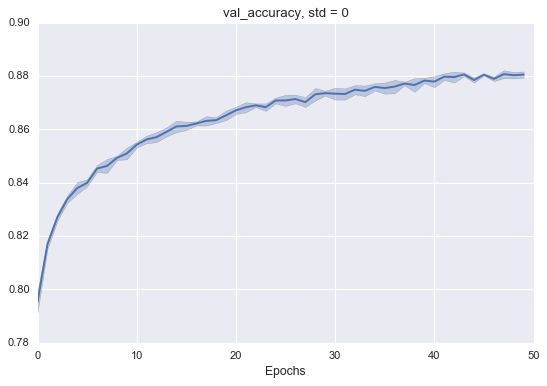

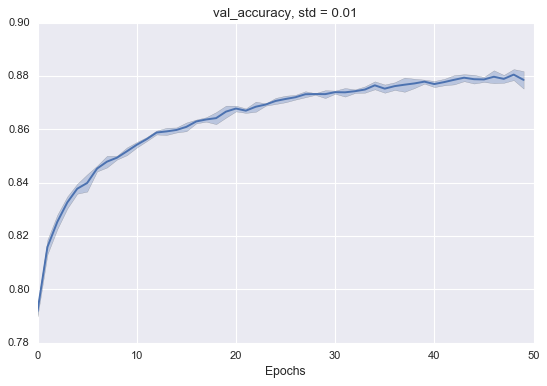

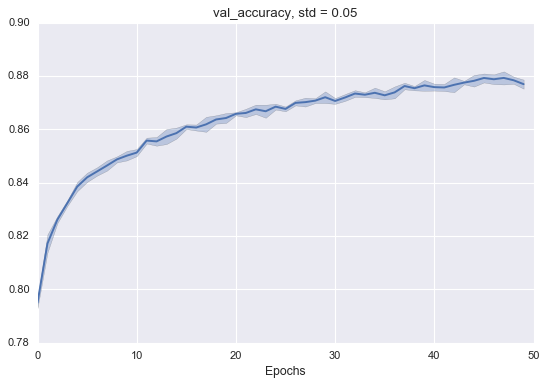

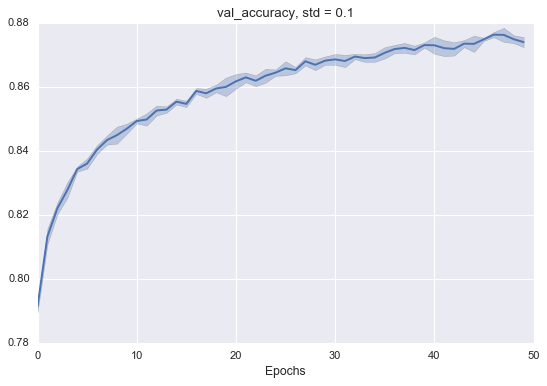

Wall time: 59min 11s


In [123]:
%%time

plt.style.use('seaborn')
for std in [0, 0.01, 0.05, 0.1]:
    val_accuracies = get_val_accuracies(std, num=5, epochs=50)
    plot_val_accuracies_means_stds(val_accuracies, std)

**Выводы:**   
Видно, что с увеличением _sigma_ точность немного падает